# Amazon Fine Food Reviews Analysis


Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews <br>

EDA: https://nycdatascience.com/blog/student-works/amazon-fine-foods-visualization/


The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (rating of 4 or 5) or negative (rating of 1 or 2).

<br>
[Q] How to determine if a review is positive or negative?<br>
<br> 
[Ans] We could use Score/Rating. A rating of 4 or 5 can be cosnidered as a positive review. A rating of 1 or 2 can be considered as negative one. A review of rating 3 is considered nuetral and such reviews are ignored from our analysis. This is an approximate and proxy way of determining the polarity (positivity/negativity) of a review.




# Decision Trees

<ol>
    <li><strong>Apply Decision Trees on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>          
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 20 important features from both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using `feature_importances_` method of <a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>Decision Tree Classifier</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying Decision Trees

# Import Required Packages

In [1]:
import os
from datetime import datetime
import pandas as pd
import numpy as np

# visualization related packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# data prerocessing related
from sklearn.preprocessing import StandardScaler

# import model related packages & its visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# import model selection packages
from sklearn.model_selection import StratifiedKFold

# import model evaluation related packages
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import auc, roc_curve
from scipy import interp

# calibration related package
from sklearn.calibration import CalibratedClassifierCV

# visualization related packages
from wordcloud import WordCloud
from prettytable import PrettyTable

# for forming grid
from itertools import product

# UTILS Function

## Data Preprocessing related Functions

In [2]:
def preprocess_data(config_dict, scaling=True, dim_reduction=False):
    """
    This function does preprocessing of data such as column standardization and
    dimensionality reduction using Truncated SVD
    """
    
    # Read train, test data frames & truncate it as needed
    train_df = pd.read_csv(config_dict['train_csv_path'], index_col=False)
    train_df = train_df.iloc[0:config_dict['train_size']]
    test_df = pd.read_csv(config_dict['test_csv_path'], index_col=False)
    test_df = test_df.iloc[0:config_dict['test_size']]

    # print the statisics of train, test df
    print('Train df shape',train_df.shape)
    print('Class label distribution in train df:\n', train_df['Label'].value_counts())
    print('Test df shape',test_df.shape)
    print('Class label distribution in test df:\n', test_df['Label'].value_counts())

    # separate features and labels
    train_features = train_df.drop(['Label', 'Id'], axis=1)    
    train_labels = train_df['Label']
    test_features = test_df.drop(['Label', 'Id'], axis=1)
    test_labels = test_df['Label']
    
    # set feature names
    feature_name_list = train_features.columns.values.tolist()
    
    # If Scaling is opted scale the train, test data
    if scaling:
        standard_scaler = StandardScaler()
        standard_scaler.fit(train_features)
    
        train_features = pd.DataFrame(standard_scaler.transform(train_features), 
                                      columns=feature_name_list)
        test_features = pd.DataFrame(standard_scaler.transform(test_features),
                                     columns=feature_name_list)
                             
    print('Shape of ->  train features :%d,%d, test features: %d,%d'%(train_features.shape +  
                                                                      test_features.shape))
    print('Shape of -> train labels :%d, test labels: %d'%(train_labels.shape[0], 
                                                           test_labels.shape[0],))
    
    # if dim reduction is opted, reduce the dimension
    if dim_reduction:
        # create an SVD object
        truc_svd = TruncatedSVD(n_components=train_features.shape[1]-1, n_iter=8, algorithm='randomized')

        # fit to data
        truc_svd.fit(train_features)
        
        # get explained variance ratio of each component
        explained_var_ratios = truc_svd.explained_variance_ratio_
        
        # get cummulative ratio list for selecting the number of components
        cumulative_ratios = np.cumsum(explained_var_ratios)
        
        # plot the #components vs captured variance in the data
        plt.title('SVD Decomposition')
        plt.xlabel('Number of components')
        plt.ylabel('Cumulative Percentage Ratio')
        plt.plot(range(1, len(cumulative_ratios) + 1), cumulative_ratios)
        plt.show()

        # set a threshold for stopping selection of components.
        svd_thesh = 0.001
        # select the number of components as the first component for which the difference between cummulative ratio is
        #  very less (less than svd thresh) compared with the very next component
        selected_dim = list(filter(lambda x : x[1] < svd_thesh, enumerate(np.diff(cumulative_ratios))))[0][0]
        print('Num dimensions selected by SVD', selected_dim)
        print('Total variance captured:%f'%(cumulative_ratios[selected_dim]))

        # create an object for selecting the components
        truc_svd = TruncatedSVD(n_components=selected_dim, n_iter=8, algorithm='randomized')
        # refit with the desired number of components
        truc_svd.fit(train_features)

        # reduce the number of dimensions to selected number of components
        train_features = pd.DataFrame(truc_svd.transform(train_features))
        test_features = pd.DataFrame(truc_svd.transform(test_features))
        
        # get the shape of final data frame and print it
        size_tuple = train_features.shape + test_features.shape
        print('Shape of train df:(%d,%d), Test DF:(%d,%d)'%size_tuple)

    
    return (train_features, train_labels, test_features, test_labels,)

## Model training and Evaluation related Functions

In [3]:
def get_confusion_matrix(actual_list, predicted_list, cm_title):
    """
    This function plots the confusion matrix given ground truth and predicted
    """

    conf_matrix = confusion_matrix(actual_list, predicted_list)
    col_names = ['Negative', 'Positive']
    conf_df = pd.DataFrame(conf_matrix,columns=col_names)
    conf_df.index = col_names

    plt.figure(figsize = (5,5))

    plt.title(cm_title)
    sns.set(font_scale=1.4)#for label size
    
    
    ax= plt.subplot()
    sns.heatmap(conf_df, annot=True, annot_kws={"size": 16}, fmt='g')
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.xaxis.set_ticklabels(['Negative', 'Positive']); 
    ax.yaxis.set_ticklabels(['Negative', 'Positive']);

    plt.show()

In [4]:
def compute_auc_scores(actual_predicted_list):
    """
    This function computes the auc scores of a prediction
    """
    
    # separate actual and predicted values
    actual_probs = actual_predicted_list[0]
    predicted_probs = actual_predicted_list[1]
    
    # compute ROC curve and get the AUC value for this fold
    fpr, tpr, thresholds = roc_curve(actual_probs, predicted_probs)
    # compute AUC score
    auc_score = auc(fpr, tpr)
    
    return fpr, tpr, thresholds, auc_score    

In [5]:
def plot_roc_curves_pair(train_fold_prediction_list, inference_fold_prediction_list, plot_against,  plot=False):
    """
    This function helps to plot the ROC curve for a set of predictions for train and test.
    """
    
    # set figure size
    if plot:
        plt.figure(figsize=(10,10))

    # reference points for X axis
    ref_points = np.linspace(0.0, 1.0, 100)

    
    # -------------------- 1 FOR TRAIN --------------------------------------------
    # two lists for auc values and tpr rates
    auc_scores_list = list()
    tpr_list = list()
    
    # plot ROC curve for each fold
    for index, actual_predicted_tuple in enumerate(train_fold_prediction_list):

        # get roc info list
        fpr, tpr, thresholds, auc_score = compute_auc_scores(actual_predicted_tuple)

        # interpolation to approximate the curve
        tp_rates = interp(ref_points, fpr, tpr)
        tp_rates[0] = 0.0 # for setting the bottom left point

        # for plotting the individual fold and finding the average
        auc_scores_list.append(auc_score)
        tpr_list.append(tp_rates)

        # plot this fold info into a fig
        if plot:
            plt.plot(fpr, tpr, alpha=0.6, lw=2, color='b', 
                     label='Train AUC for fold %d : %f'%(index+1, auc_score))
        
        # assign as mean auc
        train_mean_auc = auc_score
        
    
    # if more than one curve is present plot the mean curve
    if len(train_fold_prediction_list) > 1:
        
        # Plot the mean performance
        mean_tpr = np.mean(tpr_list, axis=0)
        std_tprs = np.std(tpr_list, axis=0)
        
        # mean value of AUC and its standard deviation
        mean_auc = auc(ref_points, mean_tpr)
        std_auc = np.std(auc_scores_list)
        
        # train mean auc
        train_mean_auc = mean_auc
        
        if plot:
            plt.plot(ref_points, mean_tpr, linestyle='-', color='b', lw=3, 
                     alpha=0.8, label='Train Mean AUC %f $\pm$ %f'%(mean_auc,std_auc))


            # Find upper and lower bounds for shading the region around TPRs
            tprs_lower_region = np.maximum(mean_tpr - std_tprs, 0)
            tprs_upper_region = np.minimum(mean_tpr + std_tprs, 1)

            # Fill the region between upper and lower in gray color
            plt.fill_between(ref_points, tprs_lower_region, tprs_upper_region, color='b', alpha=0.2, 
                            label='Train Around the mean TPRs')
    
        
    # -------------------- 1 FOR VALIDATION --------------------------------------------
    # two lists for auc values and tpr rates
    auc_scores_list = list()
    tpr_list = list()
    
    # plot ROC curve for each fold
    for index, actual_predicted_tuple in enumerate(inference_fold_prediction_list):

        # get roc info list
        fpr, tpr, thresholds, auc_score = compute_auc_scores(actual_predicted_tuple)

        # interpolation to approximate the curve
        tp_rates = interp(ref_points, fpr, tpr)
        tp_rates[0] = 0.0 # for setting the bottom left point

        # for plotting the individual fold and finding the average
        auc_scores_list.append(auc_score)
        tpr_list.append(tp_rates)

        # plot this fold info into a fig
        if plot:
            plt.plot(fpr, tpr, alpha=0.6, lw=2, color='g',
                     label= plot_against +' AUC for fold %d : %f'%(index+1, auc_score))
        
        # assign as mean auc
        val_mean_auc = auc_score
        
        
    if len(inference_fold_prediction_list) > 1:

        # Plot the mean performance
        mean_tpr = np.mean(tpr_list, axis=0)
        std_tprs = np.std(tpr_list, axis=0)
        
        # mean value of AUC and its standard deviation
        mean_auc = auc(ref_points, mean_tpr)
        std_auc = np.std(auc_scores_list)

        # val mean auc
        val_mean_auc = mean_auc

        if plot:
            plt.plot(ref_points, mean_tpr, linestyle='-', color='g', lw=3, 
                     alpha=0.8, label= plot_against + ' Mean AUC %f $\pm$ %f'%(mean_auc,std_auc))


            # Find upper and lower bounds for shading the region around TPRs
            tprs_lower_region = np.maximum(mean_tpr - std_tprs, 0)
            tprs_upper_region = np.minimum(mean_tpr + std_tprs, 1)

            # Fill the region between upper and lower in gray color
            plt.fill_between(ref_points, tprs_lower_region, tprs_upper_region, color='g', alpha=0.2, 
                            label= plot_against + ' Around the mean TPRs')
    
    # Plot the random classifier
    if plot:
        plt.plot([0,1],[0,1], alpha=0.8, linestyle='--', color='red', label='Random Guess', lw=2)
        # arange the plot
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rates')
        plt.ylabel('True Positive Rates')
        plt.title('ROC - Train V/S ' + plot_against)
        plt.legend(loc='lower right')
        plt.show()
    
    return (train_mean_auc, val_mean_auc)

In [6]:
def create_hyperparam_heatmap(hyper_param_score_list, hamp_title):
    """
    This function accepts a list containing the hyper parameters ('max_depth', 'min_splits') and 
    the corresponding score value, such as AUC, FScore etc and plot the heatmap.
    """
    
    hyp_score_list = [item[1] for item in hyper_param_score_list]
    coord_list = [item[0] for item in hyper_param_score_list]
    hyp_df = pd.DataFrame(coord_list, columns=['max_depth', 'min_splits'])
    hyp_df['AUC'] = hyp_score_list
    
    # pivot the table for heatmap representation
    pivoted_hyp = pd.pivot_table(hyp_df, index='max_depth', columns='min_splits', 
                                       values='AUC', fill_value=0)
    sns.heatmap(data=pivoted_hyp, annot=True)
    plt.title(hamp_title)
    plt.show()

In [7]:
def find_best_hyperparameter(config_dict, train_features, train_labels):
    """
    This function helps to find the best hyper parameter (alpha) for MultinomialNB algorithm.
    All set of hyper param values using which the model to be evaluated can be passed to the
    list hyperparam_list.
    """
    
    print('='*100)

    stratified_partition = StratifiedKFold(n_splits=3)
    
    # read some config settings
    hyperparam_list = config_dict['hyperparam_list']
    
    hyper_param_scores_list = list()

    for hyp_val in hyperparam_list:

        # declare three lists for holding prediction informations

        # for train set performance
        train_actual_labels_list = list()
        train_predicted_probs_list = list()
        train_predicted_labels_list = list()
        
        # for validation set performance
        val_actual_labels_list = list()
        val_predicted_probs_list = list()
        val_predicted_labels_list = list()
        
    
        
        # Model defined here
        dt_classifier = DecisionTreeClassifier(max_depth=hyp_val[0], min_samples_split=hyp_val[1])
        
        # Declare a calibrated classifer
        calib_classifier = CalibratedClassifierCV(base_estimator=dt_classifier,
                                                  method='isotonic',
                                                  cv='prefit')    

        # Train the model and evaluate it on the current fold data
        for train_indices, val_indices in stratified_partition.split(train_features, train_labels):

            # A) train the model suing StratifiedKFold method
            
            # get the train features, train labels for this fold
            train_feat_data = train_features.iloc[train_indices, :]
            train_label_data = train_labels[train_indices]
            
            # train the classifier
            dt_classifier.fit(train_feat_data, train_label_data)
            calib_classifier.fit(train_feat_data, train_label_data)
            
            # estimate the training metrics on (train fold)
            train_eval_y_probs = calib_classifier.predict_proba(train_feat_data)[:, 1]
            train_eval_y_value = dt_classifier.predict(train_feat_data)
            
            # save the results for ROC plot
            train_actual_labels_list.append(train_label_data)
            train_predicted_probs_list.append(train_eval_y_probs)
            train_predicted_labels_list.append(train_eval_y_value) 


            # B) predict the labels and probability for this fold (validation fold)
            
            # get the validation features, validation labels for this fold
            validation_feat_data = train_features.iloc[val_indices, :]
            validation_label_data = train_labels[val_indices]
            
            # evaluate the classifier on validation set
            val_actual_labels_list.append(validation_label_data)
            val_eval_y_probs = calib_classifier.predict_proba(validation_feat_data)[:, 1]
            val_eval_y_value = dt_classifier.predict(validation_feat_data)
            
            # save the results for ROC plot
            val_predicted_probs_list.append(val_eval_y_probs)
            val_predicted_labels_list.append(val_eval_y_value)
            
            
        # plot the results to select best hyper params
        # =========================================================================================
        # get input data for plotting train and validation
        train_fold_prediction_list = list(zip(train_actual_labels_list, train_predicted_probs_list))
        val_fold_prediction_list = list(zip(val_actual_labels_list, val_predicted_probs_list))

        # compute mean AUCs with or without plotting ROC curve
        mean_auc_train, mean_auc_val = plot_roc_curves_pair(train_fold_prediction_list, 
                                                         val_fold_prediction_list, 'Validation',  
                                                         plot=False)

        # update the list with the scores for this hyperparam for both tain, validation aucs
        hyper_param_scores_list.append((hyp_val, mean_auc_train, mean_auc_val))
        
    # plot hyper param vs AUC score
    hyp_value_list_1 = [item[0][0] for item in hyper_param_scores_list]
    hyp_value_list_2 = [item[0][1] for item in hyper_param_scores_list]
    tr_auc_list = [item[1] for item in hyper_param_scores_list]
    val_auc_list = [item[2] for item in hyper_param_scores_list]
    
    # print k vs auc
    print('\n\n max_depth vs AUC score plot')
    plt.plot(hyp_value_list_1, tr_auc_list, label='Train AUC')
    plt.plot(hyp_value_list_1, val_auc_list, label='Validation AUC')
    plt.xlabel('max_depth')
    plt.ylabel('AUC Scores')
    plt.title('max_depth vs AUC')
    plt.legend()
    plt.show()
    
    
    # print k vs auc
    print('\n\n min_split vs AUC score plot')
    plt.plot(hyp_value_list_2, tr_auc_list, label='Train AUC')
    plt.plot(hyp_value_list_2, val_auc_list, label='Validation AUC')
    plt.xlabel('min_split')
    plt.ylabel('AUC Scores')
    plt.title('min_split vs AUC')
    plt.legend()
    plt.show()
    
    # heatmap plot for selecting the best hyper params
    hyper_param_scores_list_train = [(item[0], item[1]) for item in hyper_param_scores_list]
    hyper_param_scores_list_validation = [(item[0], item[2]) for item in hyper_param_scores_list]
    
    # plot heatmap for train and validation
    create_hyperparam_heatmap(hyper_param_scores_list_train, 'Hyper param Heatmap DT-Train')
    create_hyperparam_heatmap(hyper_param_scores_list_validation, 'Hyper param Heatmap DT-Validation')

    # find the best hyperparameter based on AUC score of validation data and the
    # difference between auc validation and auc train scores
    #Set the best Hyper param based on above plots
    #print('Hyper info\n', hyper_param_scores_list)
    best_hyper_param = min(hyper_param_scores_list, key=lambda x: abs(x[1] - x[2]) + (1 / (x[2]+0.001) ))[0]
    print('\n\nBest hyperparam value: ', best_hyper_param)
    
    return best_hyper_param

In [8]:
def train_model(config_dict, train_features, train_labels):
    """
    This function train a model, validate it using cross validation and return the best model
    obtained during cross validation.
    """
    
    # get best hyperparam value
    best_hyper_param = find_best_hyperparameter(config_dict, train_features, train_labels)
   
    # Final Model defined here
    dt_classifier = DecisionTreeClassifier(max_depth=best_hyper_param[0], 
                                           min_samples_split=best_hyper_param[1])
    
    # Declare a calibrated classifer
    calib_classifier = CalibratedClassifierCV(base_estimator=dt_classifier,
                                              method='isotonic',
                                              cv='prefit')
    
    # train the classifier
    dt_classifier.fit(train_features, train_labels)
    calib_classifier.fit(train_features, train_labels)


    # return the final model 
    return (dt_classifier, calib_classifier,)

In [9]:
def evaluate_model(model, features, labels, tag_name):
    """
    This function test and evaluate the performance on unseen data.
    """
    
    # separate out models
    dt_classifier = model[0]
    calib_classifier = model[1]
    
    # estimate the training metrics on (train fold)
    eval_y_probs = calib_classifier.predict_proba(features)[:, 1]
    eval_y_value = dt_classifier.predict(features)
    
    # print the confusion matrix
    get_confusion_matrix(labels, eval_y_value, tag_name + ' Confusion Matrix')
    
    # compute precision and other matric
    all_metrics = precision_recall_fscore_support(labels, eval_y_value)
    all_metrics_df = pd.DataFrame(list(all_metrics), columns=['Negative', 'Positive'])
    all_metrics_df.index = ['Precision', 'Recall', 'Fscore', 'Support']
    
    # convert fscore to percentage
    #fscores = all_metrics[2] * 100.0
    
    print(tag_name + ' Evaluation Metrics : \n', all_metrics_df)
    
    return (eval_y_probs, eval_y_value, all_metrics_df,)

In [10]:
def get_table_entry(model, auc_score, all_metrics_df):
    """
    This function prepares a table entry for inserting into pretty table
    """
    # round off to 4 decimal places
    fscore_pos = '{0:.4f}'.format(all_metrics_df.loc['Fscore', 'Positive'] * 100.0)
    fscore_neg = '{0:.4f}'.format(all_metrics_df.loc['Fscore', 'Negative'] * 100.0)
    auc_score = '{0:.4f}'.format(auc_score)
    
    ptabe_entry = [str((model[0].max_depth, model[0].min_samples_split)), 
                   auc_score, fscore_neg, fscore_pos]
    
    print('Results Summary: \n', list(zip(['Hyper Param', 'AUC', 'f-score(-ve)', 'f-score(+ve)'], 
                                          ptabe_entry)))
    
    return ptabe_entry

## [A] Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [11]:
# form two lists
depth_list = [1, 5, 10, 50, 100, 500, 1000] # depends on size of dataset
min_split_list = [5, 10, 100, 500] # depends on size of dataset

# create a configuartion dictionary
config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/train_bow_bigram.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/BOW/test_bow_bigram.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : product(depth_list, min_split_list)
}

Train df shape (69997, 503)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 503)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,501, test features: 30000,501
Shape of -> train labels :69997, test labels: 30000


 max_depth vs AUC score plot


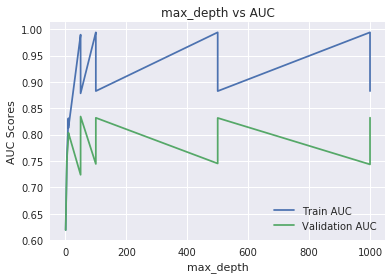



 min_split vs AUC score plot


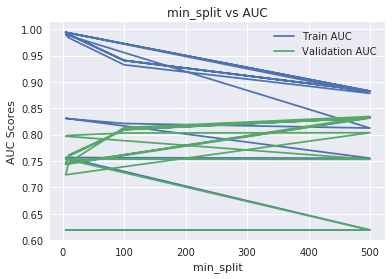

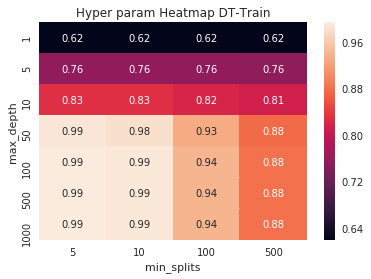

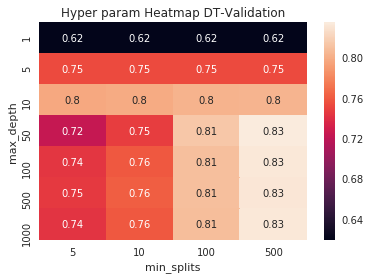



Best hyperparam value:  (50, 500)


/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


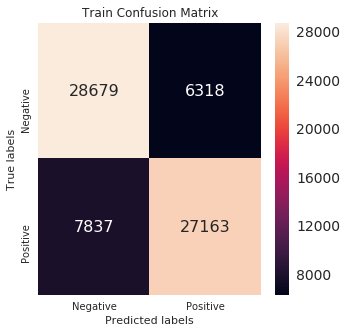

Train Evaluation Metrics : 
                Negative      Positive
Precision      0.785382      0.811296
Recall         0.819470      0.776086
Fscore         0.802064      0.793300
Support    34997.000000  35000.000000


/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


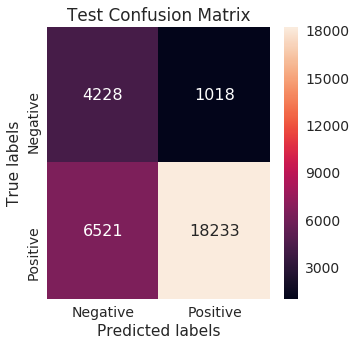

Test Evaluation Metrics : 
               Negative      Positive
Precision     0.393339      0.947120
Recall        0.805947      0.736568
Fscore        0.528665      0.828679
Support    5246.000000  24754.000000


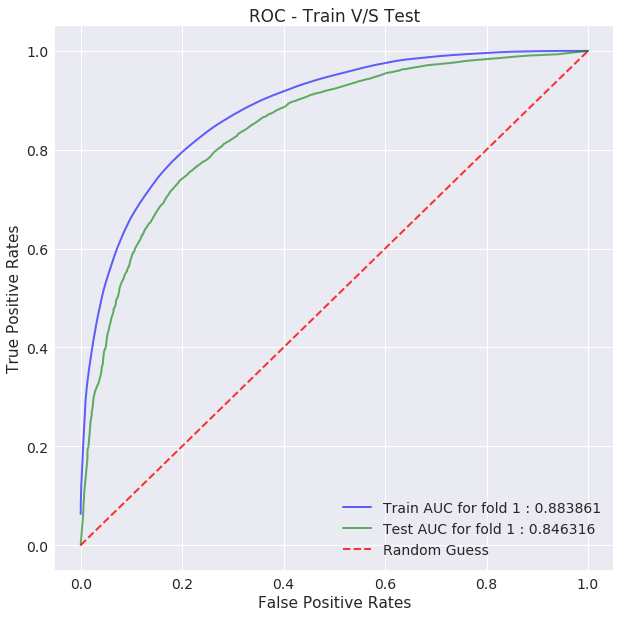

Results Summary: 
 [('Hyper Param', '(50, 500)'), ('AUC', '0.8463'), ('f-score(-ve)', '52.8665'), ('f-score(+ve)', '82.8679')]


In [12]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                           scaling=True,
                                                                           dim_reduction=False)

# get name of all features in a list
feature_name_list = train_features.columns.values.tolist()

# train the model
model = train_model(config_dict, train_features, train_labels)

# evaluate trained model on train data
tr_eval_y_probs, tr_eval_y_value, tr_all_metrics_df = evaluate_model(model, train_features, train_labels, 'Train')

# evaluate trained model on test data
ts_eval_y_probs, ts_eval_y_value, ts_all_metrics_df = evaluate_model(model, test_features, test_labels, 'Test')

#  plotting performace of final model on train and test
tr_fold_prediction_list = list(zip([train_labels], [tr_eval_y_probs]))
ts_fold_prediction_list = list(zip([test_labels], [ts_eval_y_probs]))
auc_train, auc_ts = plot_roc_curves_pair(tr_fold_prediction_list, 
                                         ts_fold_prediction_list, 'Test',  
                                         plot=True)

# get entry for pretty table
ptabe_entry_a = get_table_entry(model, auc_ts, ts_all_metrics_df)

## Observation

%%HTML
<ul>
<li> From depth vs AUC curves, as the depth of the tree increases very large, the auc score showed increase for
     train and validation auc showd decreases (overfit)</li>
<li> The best value of hyper param are (max_depth:50, min_samples_split:500) </li>
<ul>

### [A.1] Top 20 important features from<font color='red'> SET 1</font>

In [13]:
# get feature and its importance as tuple
feature_imp_info = list(zip(feature_name_list, model[0].feature_importances_))

# filter only those features which have a value greater than zero
feature_imp_dict = dict(list(filter(lambda x: x[1] > 0.0, feature_imp_info)))

# create word cloud object for displaying the output
wc = WordCloud(background_color='white', width=800, height=800)
wc_output = wc.generate_from_frequencies(feature_imp_dict)

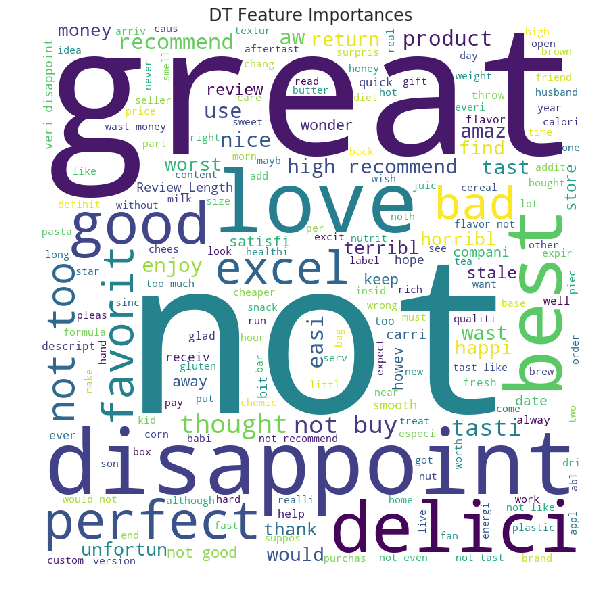

In [14]:
plt.figure(figsize=(8,8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('DT Feature Importances')
plt.show()

## Observations

%%HTML
<ul>
<li> The important feature identified include a bigram 'high recommend' </li>
<li> The important features identified include unigram features such as 'great', 'disappoint' etc.</li>
<ul>

### [A.2] Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [15]:
graph_data = export_graphviz(model[0], out_file=None, filled=True, rounded=True, special_characters=True,
                            max_depth=3, class_names = ['NO', 'YES'], feature_names = feature_name_list)

In [16]:
out_file = graphviz.Source(graph_data)
out_file.render('graph_viz_a2')

'graph_viz_a2.pdf'

## Observation

%%HTML
<ul>
 <li> From the tree visualization the decisions are made by following the path 'not -> disappoint', 'not -> great'  etc. </li> 
    <li> The decision node contains some bigram features such as 'veri disappoint'</li>
</ul>

## [B] Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [17]:
# form two lists
depth_list = [1, 5, 10, 50, 100, 500] # depends on size of dataset
min_split_list = [5, 10,100, 500] # depends on size of dataset

config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/train_bigram_tfidf.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF/test_bigram_tfidf.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : product(depth_list, min_split_list)
}

Train df shape (69997, 503)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 503)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,501, test features: 30000,501
Shape of -> train labels :69997, test labels: 30000


 max_depth vs AUC score plot


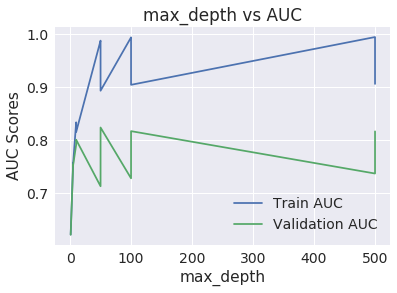



 min_split vs AUC score plot


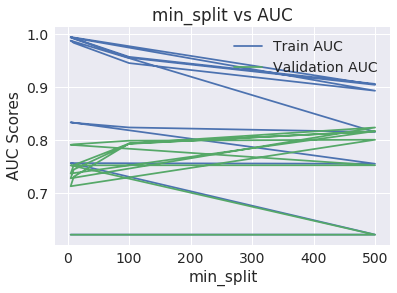

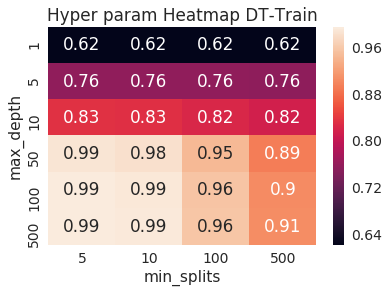

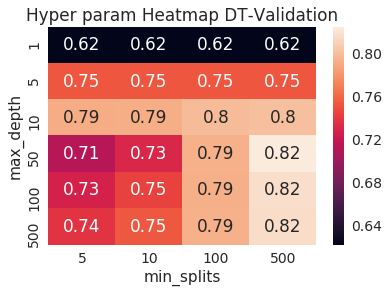



Best hyperparam value:  (10, 500)


/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


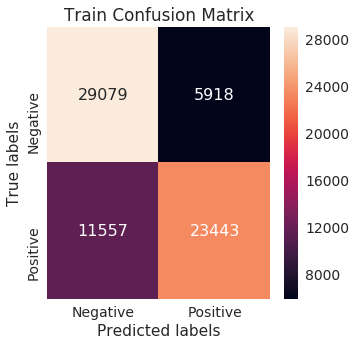

/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train Evaluation Metrics : 
                Negative      Positive
Precision      0.715597      0.798440
Recall         0.830900      0.669800
Fscore         0.768950      0.728485
Support    34997.000000  35000.000000


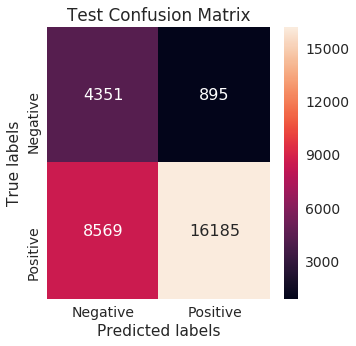

Test Evaluation Metrics : 
               Negative      Positive
Precision     0.336765      0.947600
Recall        0.829394      0.653834
Fscore        0.479027      0.773773
Support    5246.000000  24754.000000


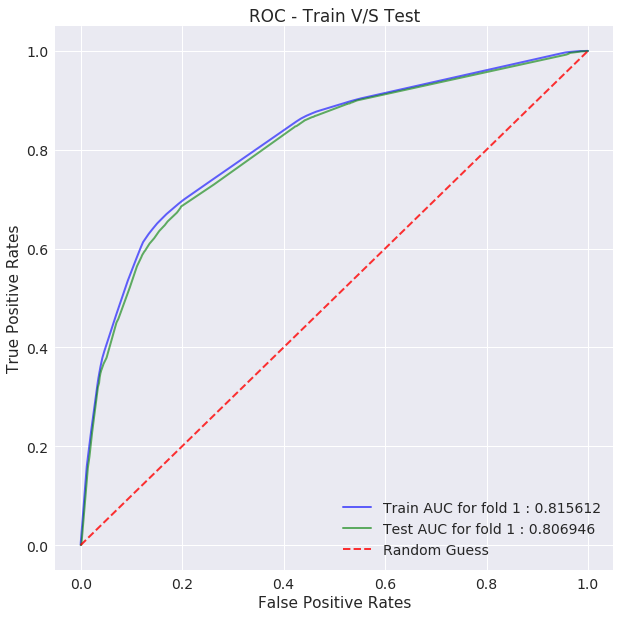

Results Summary: 
 [('Hyper Param', '(10, 500)'), ('AUC', '0.8069'), ('f-score(-ve)', '47.9027'), ('f-score(+ve)', '77.3773')]


In [18]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                           scaling=True,
                                                                           dim_reduction=False)

# get name of all features in a list
feature_name_list = train_features.columns.values.tolist()

# train the model
model = train_model(config_dict, train_features, train_labels)

# evaluate trained model on train data
tr_eval_y_probs, tr_eval_y_value, tr_all_metrics_df = evaluate_model(model, train_features, train_labels, 'Train')

# evaluate trained model on test data
ts_eval_y_probs, ts_eval_y_value, ts_all_metrics_df = evaluate_model(model, test_features, test_labels, 'Test')

#  plotting performace of final model on train and test
tr_fold_prediction_list = list(zip([train_labels], [tr_eval_y_probs]))
ts_fold_prediction_list = list(zip([test_labels], [ts_eval_y_probs]))
auc_train, auc_ts = plot_roc_curves_pair(tr_fold_prediction_list, 
                                         ts_fold_prediction_list, 'Test',  
                                         plot=True)

# get entry for pretty table
ptabe_entry_b = get_table_entry(model, auc_ts, ts_all_metrics_df)

%%HTML
<ul>
<li>The precision for -ve class is less (0.33) </li>
<li> There are 8569 positive data points which got misclassiified</li>
<li> From the hyper param vs auc curve, as the depth of tree increases very large model showed a tendancy to overfit</li>
</ul>

### [B.1] Top 20 important features from<font color='red'> SET 2</font>

In [19]:
# get feature and its importance as tuple
feature_imp_info = list(zip(feature_name_list, model[0].feature_importances_))

# filter only those features which have a value greater than zero
feature_imp_dict = dict(list(filter(lambda x: x[1] > 0.0, feature_imp_info)))

# create word cloud object for displaying the output
wc = WordCloud(background_color='white', width=800, height=800)
wc_output = wc.generate_from_frequencies(feature_imp_dict)

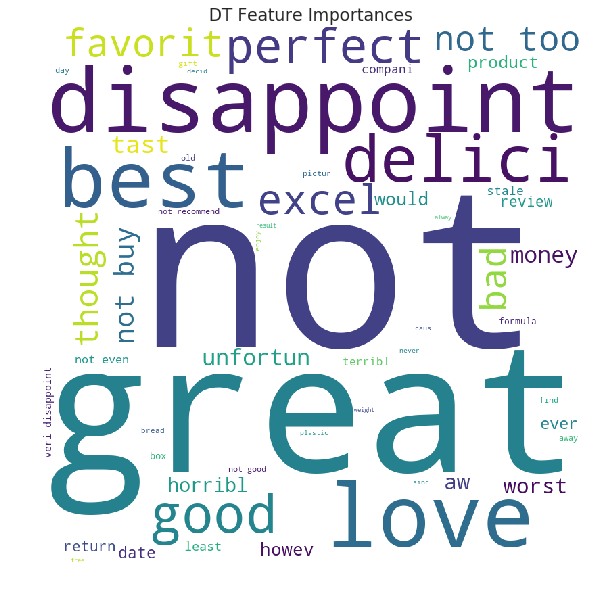

In [20]:
plt.figure(figsize=(8,8))
plt.imshow(wc_output)
plt.axis('off')
plt.tight_layout(pad=0.0)
plt.title('DT Feature Importances')
plt.show()

### [B.2] Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [21]:
graph_data = export_graphviz(model[0], out_file=None, filled=True, rounded=True, special_characters=True,
                             max_depth=3, class_names = ['NO', 'YES'], feature_names = feature_name_list)

In [22]:
out_file = graphviz.Source(graph_data)
out_file.render('graph_viz_b2')

'graph_viz_b2.pdf'

## Observations

<ul>
<li> Observations are similar to the Bow case</li>
</ul>

## [C] Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [23]:
# form two lists
depth_list = [1, 5, 10, 50, 100, 500] # depends on size of dataset
min_split_list = [5, 10,100, 500] # depends on size of dataset

config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/train_avg_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/AVG_W2V/test_avg_w2v.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : product(depth_list, min_split_list)
}

Train df shape (69997, 52)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 52)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,50, test features: 30000,50
Shape of -> train labels :69997, test labels: 30000


 max_depth vs AUC score plot


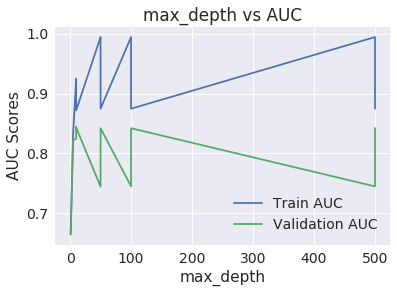



 min_split vs AUC score plot


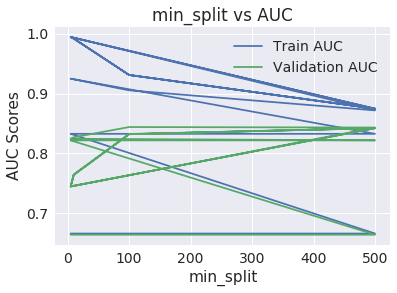

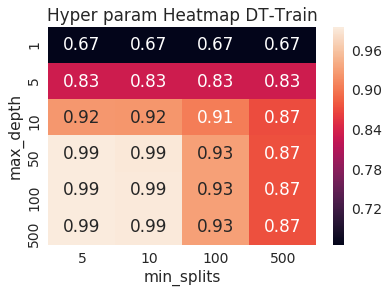

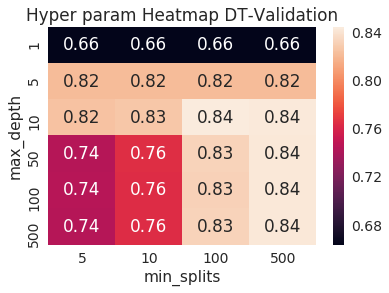



Best hyperparam value:  (10, 500)


/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


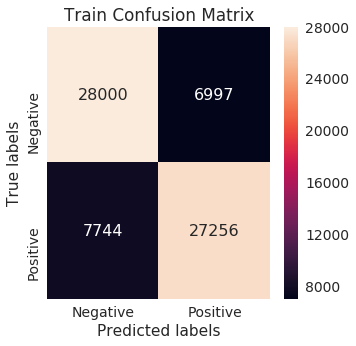

/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train Evaluation Metrics : 
                Negative      Positive
Precision      0.783348      0.795726
Recall         0.800069      0.778743
Fscore         0.791620      0.787143
Support    34997.000000  35000.000000


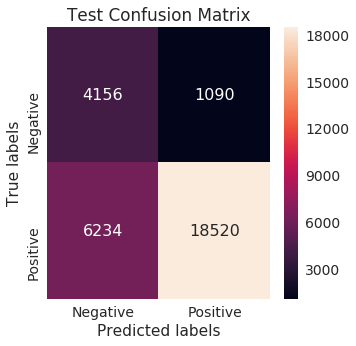

Test Evaluation Metrics : 
               Negative      Positive
Precision     0.400000      0.944416
Recall        0.792223      0.748162
Fscore        0.531594      0.834911
Support    5246.000000  24754.000000


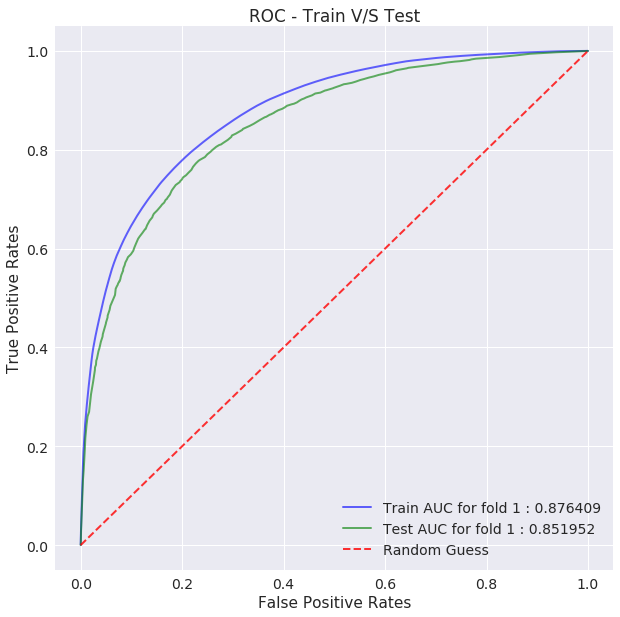

Results Summary: 
 [('Hyper Param', '(10, 500)'), ('AUC', '0.8520'), ('f-score(-ve)', '53.1594'), ('f-score(+ve)', '83.4911')]


In [24]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                           scaling=True,
                                                                           dim_reduction=False)

# get name of all features in a list
feature_name_list = train_features.columns.values.tolist()

# train the model
model = train_model(config_dict, train_features, train_labels)

# evaluate trained model on train data
tr_eval_y_probs, tr_eval_y_value, tr_all_metrics_df = evaluate_model(model, train_features, train_labels, 'Train')

# evaluate trained model on test data
ts_eval_y_probs, ts_eval_y_value, ts_all_metrics_df = evaluate_model(model, test_features, test_labels, 'Test')

#  plotting performace of final model on train and test
tr_fold_prediction_list = list(zip([train_labels], [tr_eval_y_probs]))
ts_fold_prediction_list = list(zip([test_labels], [ts_eval_y_probs]))
auc_train, auc_ts = plot_roc_curves_pair(tr_fold_prediction_list, 
                                         ts_fold_prediction_list, 'Test',  
                                         plot=True)

# get entry for pretty table
ptabe_entry_c = get_table_entry(model, auc_ts, ts_all_metrics_df)

%%HTML
<ul>
<li>The precision for -ve class is less (0.40) </li>
<li> There are 6234 positive data points which got misclassiified</li>
<li> As the depth increases the model showed a tendancy to overfit</li>
</ul>

## [D] Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [25]:
# form two lists
depth_list = [1, 5, 10, 50, 100, 500] # depends on size of dataset
min_split_list = [5, 10,100, 500] # depends on size of dataset

config_dict = {
    'train_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/train_tf_w2v.csv',
    'test_csv_path' : '/home/amd_3/AAIC/ASM_REPO/Processed_data/AMZN_FOOD_REVIW/TFIDF_W2V/test_tf_w2v.csv',
    'train_size' : 70000,
    'test_size' : 30000,
    'hyperparam_list' : product(depth_list, min_split_list)
}

Train df shape (69997, 52)
Class label distribution in train df:
 1    35000
0    34997
Name: Label, dtype: int64
Test df shape (30000, 52)
Class label distribution in test df:
 1    24754
0     5246
Name: Label, dtype: int64
Shape of ->  train features :69997,50, test features: 30000,50
Shape of -> train labels :69997, test labels: 30000


 max_depth vs AUC score plot


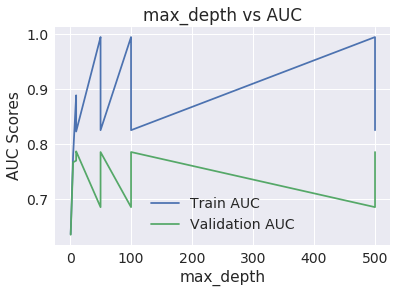



 min_split vs AUC score plot


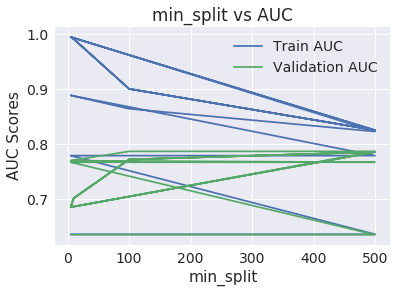

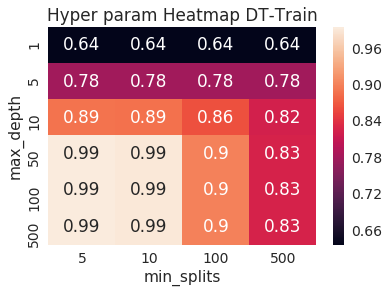

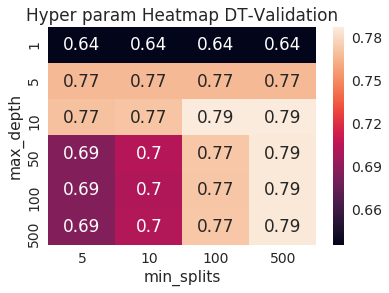



Best hyperparam value:  (10, 500)


/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


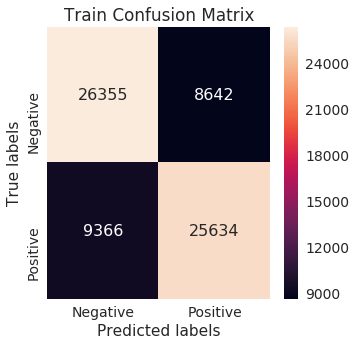

/home/amd_3/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Train Evaluation Metrics : 
                Negative      Positive
Precision      0.737801      0.747870
Recall         0.753065      0.732400
Fscore         0.745355      0.740054
Support    34997.000000  35000.000000


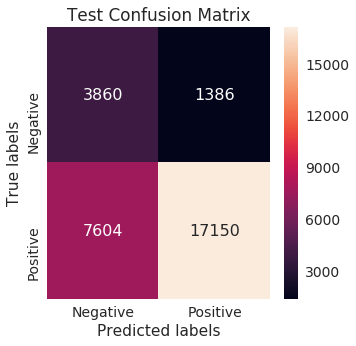

Test Evaluation Metrics : 
               Negative      Positive
Precision     0.336706      0.925227
Recall        0.735799      0.692817
Fscore        0.461999      0.792331
Support    5246.000000  24754.000000


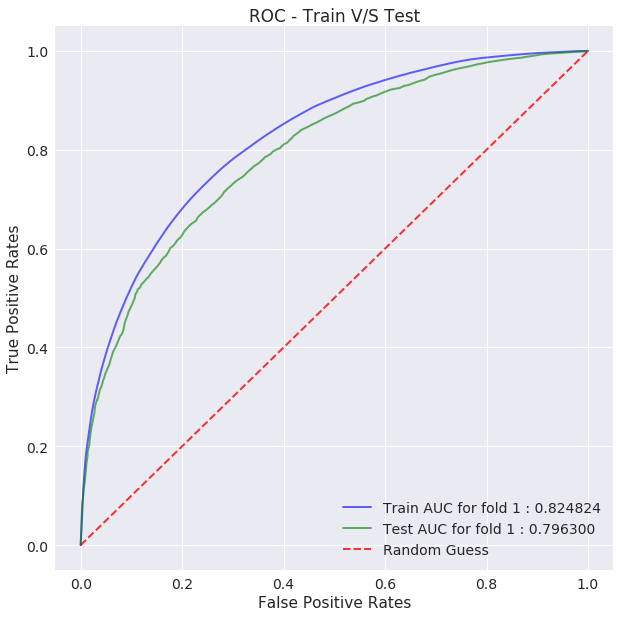

Results Summary: 
 [('Hyper Param', '(10, 500)'), ('AUC', '0.7963'), ('f-score(-ve)', '46.1999'), ('f-score(+ve)', '79.2331')]


In [26]:
# read the train, test data and preprocess it
train_features, train_labels, test_features, test_labels = preprocess_data(config_dict,
                                                                           scaling=True,
                                                                           dim_reduction=False)

# get name of all features in a list
feature_name_list = train_features.columns.values.tolist()

# train the model
model = train_model(config_dict, train_features, train_labels)

# evaluate trained model on train data
tr_eval_y_probs, tr_eval_y_value, tr_all_metrics_df = evaluate_model(model, train_features, train_labels, 'Train')

# evaluate trained model on test data
ts_eval_y_probs, ts_eval_y_value, ts_all_metrics_df = evaluate_model(model, test_features, test_labels, 'Test')

#  plotting performace of final model on train and test
tr_fold_prediction_list = list(zip([train_labels], [tr_eval_y_probs]))
ts_fold_prediction_list = list(zip([test_labels], [ts_eval_y_probs]))
auc_train, auc_ts = plot_roc_curves_pair(tr_fold_prediction_list, 
                                         ts_fold_prediction_list, 'Test',  
                                         plot=True)

# get entry for pretty table
ptabe_entry_d = get_table_entry(model, auc_ts, ts_all_metrics_df)

%%HTML
<ul>
<li> The precision for -ve class is less (0.33) </li>
<li> There are 7604 positive data points which got misclassiified</li>
<li> As the depth increases the model shows a tendancy to overfit</li>
</ul>

## Observation

%%HTML
<ul>
<li> As the depth of the tree increases very large, generally the model showed overfit </li>
</ul>

# Procedure Summary

%%HTML
<ol>
<li> Train the Decision tree model with different hyper parameter settings </li>
<li> Select the best model based on the AUC score on validation data set </li>
<li> Idenify the important features and represent it in a wordcloud </li>
<li> Visualize the tree using graphviz, this helps to understand how decision tree performs
     classification by looking into the attribute values </li>
</ol>

# Results Summary

In [27]:
Pret_table = PrettyTable()
Pret_table.field_names = ['Vectorizer', '(depth, min_split)', 'AUC', 'Fscore (-ve)', 'Fscore (+ve)']
Pret_table.title = 'DT Results Summary'

In [28]:
# Decision Tree Results Summary
Pret_table.add_row(['BoW'] + ptabe_entry_a)
Pret_table.add_row(['TF-IDF'] + ptabe_entry_b)
Pret_table.add_row(['Avg W2V'] + ptabe_entry_c)
Pret_table.add_row(['TF-IDF W2V'] + ptabe_entry_d)

In [29]:
print(Pret_table)

+------------------------------------------------------------------------+
|                           DT Results Summary                           |
+------------+--------------------+--------+--------------+--------------+
| Vectorizer | (depth, min_split) |  AUC   | Fscore (-ve) | Fscore (+ve) |
+------------+--------------------+--------+--------------+--------------+
|    BoW     |     (50, 500)      | 0.8463 |   52.8665    |   82.8679    |
|   TF-IDF   |     (10, 500)      | 0.8069 |   47.9027    |   77.3773    |
|  Avg W2V   |     (10, 500)      | 0.8520 |   53.1594    |   83.4911    |
| TF-IDF W2V |     (10, 500)      | 0.7963 |   46.1999    |   79.2331    |
+------------+--------------------+--------+--------------+--------------+


# Conclusions

%%HTML
<ul>
<li> Comparing with other models Average W2V model showed good performace in terms of f1score on 
     both +ve and -ve class</li>
<li> The models performance on +ve class is good (77%  & above fscore) where as the negative
     class performance is not that good (53% best fscore)</li>
<li> More complicated models can be tried to improve the scores</li>
</ul>